In [2]:
import sys

In [3]:
sys.version

'3.12.2 (tags/v3.12.2:6abddd9, Feb  6 2024, 21:26:36) [MSC v.1937 64 bit (AMD64)]'

### import sys
* Provides information about constants, functions and methods of the Python interpreter.
  *  Data streams [ -> stdin, -> stdout, -> stderr]

In [4]:
sys.version_info

sys.version_info(major=3, minor=12, micro=2, releaselevel='final', serial=0)

### command-line arguments
* command line [-> argv, ->argc]

In [5]:
import sys

# it's easy to print this list of course:
print(sys.argv)

# or it can be iterated via a for loop:

for i in range(len(sys.argv)):
    if i == 0:
        print("Function name: %s" % sys.argv[0])
    else:
        print("%d. argument: %s" % (i, sys.argv[i]))
            

['C:\\Users\\salam\\AppData\\Roaming\\Python\\Python312\\site-packages\\ipykernel_launcher.py', '--f=c:\\Users\\salam\\AppData\\Roaming\\jupyter\\runtime\\kernel-v2-12356FduX9ne8RVK2.json']
Function name: C:\Users\salam\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py
1. argument: --f=c:\Users\salam\AppData\Roaming\jupyter\runtime\kernel-v2-12356FduX9ne8RVK2.json


### output behavior
* Python interactive Mode -> Write expression -> Get Output

In [6]:
import sys
x = 42
x

42

In [7]:
def my_display(x):
    print("out:"),
    print(x)

In [8]:
sys.displayhook = my_display

In [9]:
x

42

### Standard Data Streams
* Shell [-> stdin, ->stdout, -> stderr]


In [10]:
import sys
for i in (sys.stdin, sys.stdout, sys.stderr):
    print(i)

<_io.TextIOWrapper name='<stdin>' mode='r' encoding='utf-8'>


In [11]:
import sys
print("Going via stdout")

Going via stdout


In [12]:
sys.stdout.write("Another way to do it!\n")

Another way to do it!


22

In [13]:
x = raw_input("read value via stdin: ")

NameError: name 'raw_input' is not defined

In [14]:
print("type in value: ", sys.stdin.readline()[:-1])

In [10]:
4

4

### Redirections

In [11]:
import sys
print("Coming through stdout")

Coming through stdout


In [12]:
# stdout is saved
save_stdout = sys.stdout
fh = open("open.txt", "w")

In [13]:
sys.stdout = fh
print("This line goes to test.txt")

In [14]:
# return to normal
sys.stdout = save_stdout
fh.close()

In [15]:
save_sterr = sys.stderr

In [18]:
save_sterr = sys.stderr
fh = open("errors.txt", "w")
sys.stderr = fh
x = 10/0

# return to normal:
sys.stderr = save_stderr
fh.close

ZeroDivisionError: division by zero

In [21]:
save_stderr = sys.stderr
fh = open("errors.txt", "w")
sys.stderr = fh

x = 10/0

# return to normal:
sys.stderr = save_stderr
fh.close

ZeroDivisionError: division by zero

### Variables & Constants in Sys Module
* variable * constants
 *  byteorder, executable, maxint, modules, path, platform

### Python and Shell
* A piece of software that provides an interface for a user to some other software of the operating system

* Shell 
    *  -> GUI
    *  -> GUI -> Bourne-Shell, C-Shell, Bash Shell

### System programming
* The activity of programming system components or system software

* "System focussed programming"
 *  modules
    *  sys
    *  os

### Advantages
* Simple and clear
* Well structured
* Highly flexible

### The 'os' Module
* Executing Shell scripts with os.system()

* Subprocess Module
 *  os.system -> os.spawn* -> os.popen*

In [24]:
import os, platform

if platform.system() == "Windows":
    import msvcrt
def getch():
    if platform.system() == "Linux":
        os.system("bash - c\ "read -n 
                  1\"")
    else:
        msvcrt.getch()
print("Type a key!")
getch()
print("Okay")

SyntaxError: invalid syntax (<ipython-input-24-93620768b7dc>, line 7)

### Fork in Python

* Process -> Parent
* Copy of Process -> Child

* Starting independent processes with fork()
 *  exec*() function

In [27]:
import os

def child():
    print('\nA new child', os.getpid())
    os._exit(0)

def parent():
    while True:
        newpid = os.fork()
        if newpid == 0:
            child()
        else:
            pids = (os.getpid(), newpid)
            print("parent:  %d, child: %d\n" %pids)
        reply = input("q for quit /c for new fork")
        if reply == 'c':
                  continue
        else:
                  break
parent()

AttributeError: module 'os' has no attribute 'fork'

### exec*() functions
* os.execl(path, arg0, arg1, ...)
* os.execle(path, arg0, arg1, ...)
* etc.

* execl* (path, args), exexp*(file, a1, a2, a3, ...)
* execle* (path, args, env), exexpe*(file, a1, ..., env)

### What is thread?
* The smallest unit that can be scheduled in an operating system
* How to create a thread?
* By forking a computer program in two or more parallel tasks
* -> Types of threads: * kernel threads, * User threads

### Global Variables
In Python, a variable declared outside of the function or in global scope is known as **global variable**. This means, global variable can be accessed inside or outside of the function.

In [7]:
import threading

In [22]:
from threading import Thread

def heron(a):
    """Calculate the square root of a"""
    eps = 0.0000001
    old = 1
    new = 1
    while True:
        old, new = new, (new + a/new) / 2.0
        print(old, new)
        if abs(new - old) < eps:
            break
    return new

heron(999)


1 500.0
500.0 250.999
250.999 127.48954776911462
127.48954776911462 67.66274213168452
67.66274213168452 41.21357261818075
41.21357261818075 32.72658006314248
32.72658006314248 31.626113065211403
31.626113065211403 31.60696705743235
31.60696705743235 31.606961258558748
31.606961258558748 31.606961258558215


31.606961258558215

In [26]:
from threading import Thread

num_threads = 0
def heron(a):
    global num_threads
    num_threads += 1
    
    # code has been left out, see above
    num_threads -= 1
    return num_threads

heron(999)

while num_threads > 0:
    pass

In [ ]:
from threading import Thread, allocate_lock
num_threads = 0
thread_started = False
lock = thread.allocate_lock()

def heron(a):
    global num_threads, thread_started
    lock.

In [30]:
from threading import Thread

https://www.python-course.eu/threads.php

### Whate are pipes?
* Introducing modularity in the program to serve one instance output as the input to another instance and so on till solution is achieved
 *  Two kinds of pipes
   *  anonymous -> exist solely within processes and are usually used in combination with forks
   *  Named pipes

### 99 bottles of beer

https://www.w3resource.com/projects/python/python-projects-4.php

In [35]:
def sing(n):
	if (n == 1):
		objects = 'bottle'
		objectsMinusOne = 'bottles'
	elif (n == 2):
		objects = 'bottles'
		objectsMinusOne = 'bottle'
	else:
		objects = 'bottles'
		objectsMinusOne = 'bottles'


	if (n > 0):
		print(str(n) + " " + objects + " of beer on the wall, " + str(n) + " " + objects + " of beer.")
		print("Take one down and pass it around, " + str(n-1) + " " + objectsMinusOne + " of beer on the wall.")
		print(" ")
	elif (n == 0):
		print("No more bottles of beer on the wall, no more bottles of beer.")
		print("Go to the store and buy some more, 99 bottles of beer on the wall.")
	else:
		print("Error: Wheres the booze?")
bottles = 99

while bottles >= 0:
	sing(bottles)
	bottles -= 1

99 bottles of beer on the wall, 99 bottles of beer.
Take one down and pass it around, 98 bottles of beer on the wall.
 
98 bottles of beer on the wall, 98 bottles of beer.
Take one down and pass it around, 97 bottles of beer on the wall.
 
97 bottles of beer on the wall, 97 bottles of beer.
Take one down and pass it around, 96 bottles of beer on the wall.
 
96 bottles of beer on the wall, 96 bottles of beer.
Take one down and pass it around, 95 bottles of beer on the wall.
 
95 bottles of beer on the wall, 95 bottles of beer.
Take one down and pass it around, 94 bottles of beer on the wall.
 
94 bottles of beer on the wall, 94 bottles of beer.
Take one down and pass it around, 93 bottles of beer on the wall.
 
93 bottles of beer on the wall, 93 bottles of beer.
Take one down and pass it around, 92 bottles of beer on the wall.
 
92 bottles of beer on the wall, 92 bottles of beer.
Take one down and pass it around, 91 bottles of beer on the wall.
 
91 bottles of beer on the wall, 91 bottl

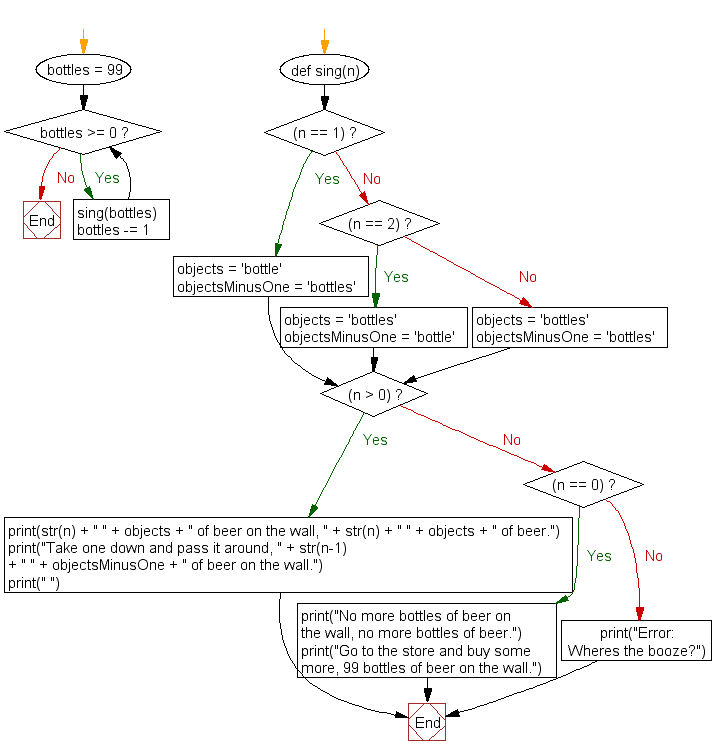

In [42]:
import time

bottles = 99
while bottles > 0:
    print(bottles,"bottles of beer on the wall")
    print(bottles,"bottles of beer")
    print("Take one down, pass it around")
    bottles = bottles - 1
    print(bottles,"bottles of beer on the wall")
    ## time.sleep(1)

99 bottles of beer on the wall
99 bottles of beer
Take one down, pass it around
98 bottles of beer on the wall
98 bottles of beer on the wall
98 bottles of beer
Take one down, pass it around
97 bottles of beer on the wall
97 bottles of beer on the wall
97 bottles of beer
Take one down, pass it around
96 bottles of beer on the wall
96 bottles of beer on the wall
96 bottles of beer
Take one down, pass it around
95 bottles of beer on the wall
95 bottles of beer on the wall
95 bottles of beer
Take one down, pass it around
94 bottles of beer on the wall
94 bottles of beer on the wall
94 bottles of beer
Take one down, pass it around
93 bottles of beer on the wall
93 bottles of beer on the wall
93 bottles of beer
Take one down, pass it around
92 bottles of beer on the wall
92 bottles of beer on the wall
92 bottles of beer
Take one down, pass it around
91 bottles of beer on the wall
91 bottles of beer on the wall
91 bottles of beer
Take one down, pass it around
90 bottles of beer on the wall
9

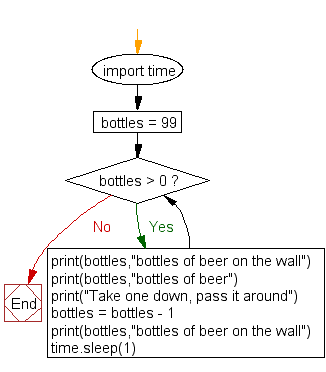

In [ ]:
 
def counter():
    for i in range(99,-1,-1):
        if i == 0:
            print ("No more bottles of beer on the wall, no more bottles of beer.")
            print ("Go to the store and buy some more,99 bottles of beer on the wall")
        elif i == 1:
            print ("1 bottle of beer on the wall, 1 bottle of beer.")
            print ("Take one down and pass it around, no more bottles of beer to go")
        elif i == 2:
            print (i," bottles of beer on the wall, ",i," bottles of beer.")
            print ("Take one down and pass it around, ",i-1," bottle of beer on the wall.")
        else :
            print (i," bottles of beer on the wall, ",i," bottles of beer.")
            print ("Take one down and pass it around, ",i-1," bottles of beer on the wall.")

counter()            


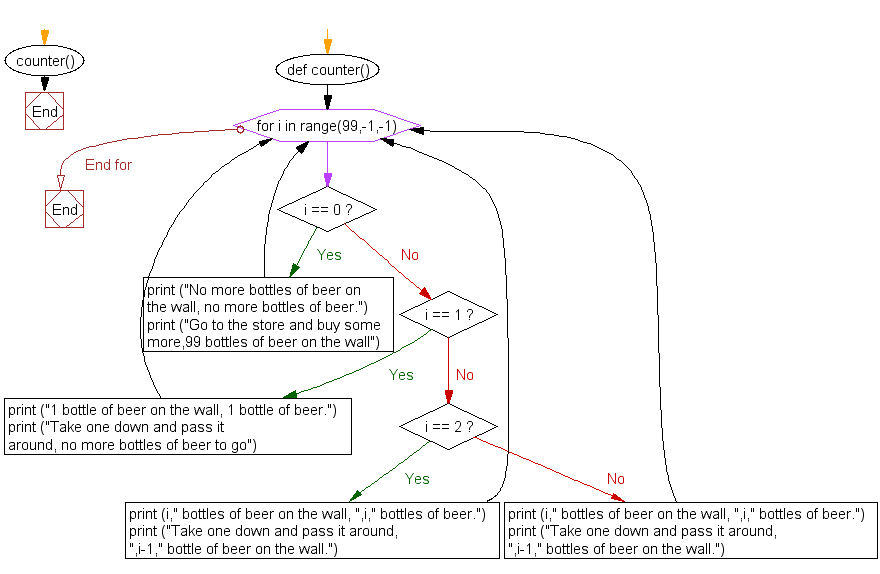

In [33]:
# https://github.com/RianGallagher/Beginner-projects-solutions/blob/master/99bottles.py
for i in range(99, 0, -1):
    if(i == 2):
        print("{} bottles of beer on the wall, {} bottles of beer, take one down, pass it around, {} bottle of beer on the wall".format(i, i, i-1))
    elif(i == 1):
        print("{} bottle of beer on the wall, {} bottle of beer, take one down, pass it around, no bottles of beer on the wall".format(i, i))
    else:
        print("{} bottles of beer on the wall, {} bottles of beer, take one down, pass it around, {} bottles of beer on the wall".format(i, i, i-1))


99 bottles of beer on the wall, 99 bottles of beer, take one down, pass it around, 98 bottles of beer on the wall
98 bottles of beer on the wall, 98 bottles of beer, take one down, pass it around, 97 bottles of beer on the wall
97 bottles of beer on the wall, 97 bottles of beer, take one down, pass it around, 96 bottles of beer on the wall
96 bottles of beer on the wall, 96 bottles of beer, take one down, pass it around, 95 bottles of beer on the wall
95 bottles of beer on the wall, 95 bottles of beer, take one down, pass it around, 94 bottles of beer on the wall
94 bottles of beer on the wall, 94 bottles of beer, take one down, pass it around, 93 bottles of beer on the wall
93 bottles of beer on the wall, 93 bottles of beer, take one down, pass it around, 92 bottles of beer on the wall
92 bottles of beer on the wall, 92 bottles of beer, take one down, pass it around, 91 bottles of beer on the wall
91 bottles of beer on the wall, 91 bottles of beer, take one down, pass it around, 90 bo

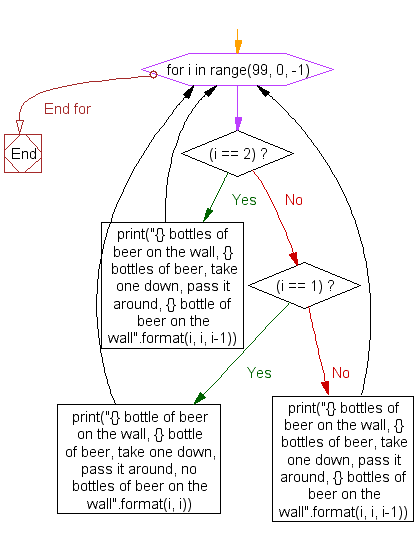

### Called FIFOs - Creating pipes which are implemented as files.
* A process read from and writes to such a pipe as if it were a regular file. Sometimes more than one process write to such a pipe but only one process reads from it.

In [39]:
class Fifo:
    def __init__(self):
        self.first = None
        self.last = None
    def append(self, data):
        node = [data, None]  # [payload, 'pointer'] "pair"
        if self.first is None:
            self.first = node
        else:
            self.last[1] = node
        self.last = node
    def pop(self):
        if self.first is None :
            raise IndexError
        node = self.first
        self.first = node[1]
        return node[0]

if __name__=='__main__':  # Run a test/example when run as a script:
    a = Fifo(  )
    a.append(10)
    a.append(20)
    print(a.pop( ))
    a.append(5)
    print(a.pop( ))
    print(a.pop ())

10
20
5
